**Classifying movie reviews: a binary classification example**

#Load the dataset

In [2]:
# from tensorflow.keras.datasets import imdb
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
train_data.shape

(25000,)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels.shape

(25000,)

In [6]:
train_labels[0]

np.int64(1)

In [7]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
# Decode reviews back to text
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decode_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)
print(decode_review)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should

Note: "0" - Padding. "1" - Start of sequence. "2" - Unknown.

#Prepare the data

**Encoding the integer sequence via multi-hot encoding**

In [9]:
# Prepare inputs

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.], shape=(10000,))

In [10]:
# Prepare outputs
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
#y_train = train_labels.copy()
#y_test = test_labels.copy()

#Build the model

**Define the model**

In [11]:
# from tensorflow import keras
# from tensorflow.keras import layers

# model = keras.Sequential(
#     [layers.Dense(16, activation="relu"),
#      layers.Dense(16, activation="relu"),
#      layers.Dense(1, activation="sigmoid")
#     ]
# )

from tensorflow import keras
# from tensorflow.keras import layers
from keras import layers

model = keras.Sequential(
    [layers.Dense(16, activation="relu"),
     layers.Dropout(0.5), # Added Dropout
     layers.Dense(16, activation="relu"),
     layers.Dropout(0.5), # Added Dropout
     layers.Dense(1, activation="sigmoid")
    ]
)

**Compile the model**

In [12]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

#Validate the model

**Fit the model with a validation set**

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
# history = model.fit(
#     partial_x_train,
#     partial_y_train,
#     epochs=20,
#     batch_size=512,
#     validation_data=(x_val, y_val)
# )

# Define the callbacks list for Early Stopping and Model Checkpointing
callbacks_list = [
    keras.callbacks.EarlyStopping(
        # Monitor validation accuracy
        monitor="val_accuracy",
        # Stop training if no improvement for 2 epochs
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        # Filepath to save the best model
        filepath="checkpoint_path.keras",
        # Monitor validation loss
        monitor="val_loss",
        # Save only the best model
        save_best_only=True,
    )
]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20, # We set a high number, but Early Stopping will stop it sooner
    batch_size=512,
    validation_data=(x_val, y_val),
    callbacks=callbacks_list # Pass the list of callbacks to fit()
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6475 - loss: 0.6225 - val_accuracy: 0.8482 - val_loss: 0.4895
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7805 - loss: 0.4947 - val_accuracy: 0.8618 - val_loss: 0.3916
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8401 - loss: 0.4056 - val_accuracy: 0.8805 - val_loss: 0.3289
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8706 - loss: 0.3508 - val_accuracy: 0.8873 - val_loss: 0.2972
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8897 - loss: 0.3021 - val_accuracy: 0.8865 - val_loss: 0.2841
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9075 - loss: 0.2649 - val_accuracy: 0.8901 - val_loss: 0.2729
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9215 - loss: 0.2386 - val_accuracy: 0.8891 - val_loss: 0.2758
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9283 - loss: 0.2123 - val_accuracy: 0.8890 - val_los

**Plot the training and validation loss**

In [15]:
import matplotlib.pyplot as plt

def plot_training_validation_results(training_results, validation_results,
                                     title, ylabel):
  print("training: ", training_results)
  print("validation: ", validation_results)
  plt.clf()
  epochs = range(1, len(training_results)+1)
  plt.plot(epochs, training_results, "bo", label="Training")
  plt.plot(epochs, validation_results, "b", label="Validation")
  plt.xlabel("Epochs")
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

training:  [0.6224738359451294, 0.4947046935558319, 0.4055718183517456, 0.35076984763145447, 0.3020540773868561, 0.2648961842060089, 0.2386428713798523, 0.21231801807880402]
validation:  [0.4894927740097046, 0.3916091322898865, 0.3288547992706299, 0.29721561074256897, 0.2841423451900482, 0.2729022800922394, 0.27583932876586914, 0.2882747948169708]


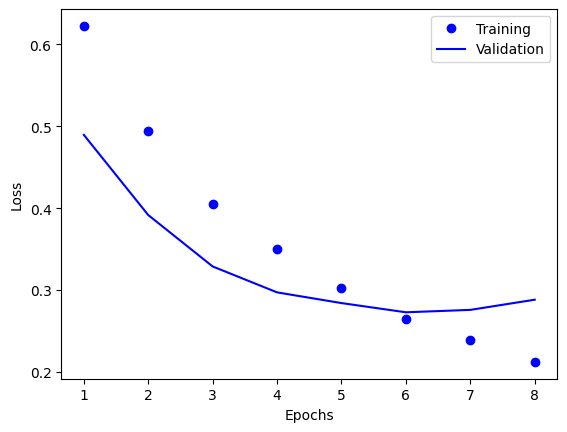

In [16]:
history_dict = history.history
training_loss_values = history_dict["loss"]
validation_loss_values = history_dict["val_loss"]
plot_training_validation_results(training_loss_values, validation_loss_values,
                                 "Training and validation loss", "Loss")

training:  [0.6474666595458984, 0.7805333137512207, 0.8401333093643188, 0.8705999851226807, 0.8897333145141602, 0.9074666500091553, 0.9215333461761475, 0.9283333420753479]
validation:  [0.8482000231742859, 0.8618000149726868, 0.8805000185966492, 0.8873000144958496, 0.8865000009536743, 0.8901000022888184, 0.8891000151634216, 0.8889999985694885]


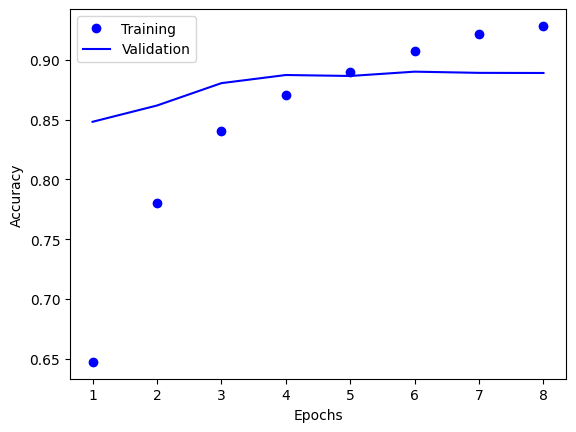

In [17]:
training_acc = history_dict["accuracy"]
validation_acc = history_dict["val_accuracy"]
plot_training_validation_results(training_acc, validation_acc,
                                 "Training and validation accuracy",
                                 "Accuracy")

**Refine the model**

In [18]:
model = keras.Sequential(
    [layers.Dense(16, activation="relu"),
     layers.Dense(16, activation="relu"),
     layers.Dense(1, activation="sigmoid")
    ]
)

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    x_train,
    y_train,
    epochs=4,
    batch_size=512
)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8132 - loss: 0.4704
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9028 - loss: 0.2775
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9212 - loss: 0.2187
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9341 - loss: 0.1850


#Predict new data

In [19]:
# Load the best model saved during training
model = keras.models.load_model("checkpoint_path.keras")

In [20]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step


array([[0.22201875],
       [0.9984941 ],
       [0.9876629 ],
       ...,
       [0.09947345],
       [0.14335363],
       [0.53549916]], shape=(25000, 1), dtype=float32)

In [21]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - accuracy: 0.8837 - loss: 0.2851
[0.28511810302734375, 0.8837199807167053]


In [22]:
y_test_pred = np.where(model.predict(x_test) > 0.5, 1, 0).ravel()
print(y_test_pred)
print('Number of test dataset samples: ', len(y_test_pred))

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
[0 1 1 ... 0 0 1]
Number of test dataset samples:  25000


In [23]:
accuracy = sum(y_test_pred == y_test) / len(y_test)
print("Accuracy: ", accuracy)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix: \n", cm)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_test_pred)
print("F1 score: ", f1)

Accuracy:  0.88372
Confusion Matrix: 
 [[11048  1452]
 [ 1455 11045]]
F1 score:  0.8837060447253671
